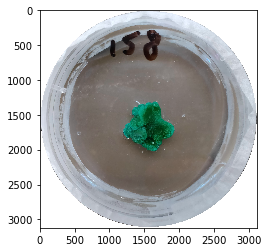

In [111]:
# READ

from photo_pipeline import calculation as ccl
import os
import plantcv 
from imutils import perspective, contours
import numpy as np
import argparse
import imutils
import cv2
import matplotlib.image as mpimg
from matplotlib import pyplot as plt
from skimage.color import rgb2gray, gray2rgb
from plantcv import plantcv as pcv
from dask_image import ndfilters
from skimage.filters import sobel, gaussian
from skimage.feature import canny
from skimage.morphology import binary_opening
from scipy import ndimage as ndi
from PIL import Image, ImageOps
from toolz import pipe

%matplotlib inline

calculate_area = lambda x: pipe(
    sum(np.ravel(x) != 0), 
    lambda a: a*(np.pi*(60/2)**2)/(np.pi*(s_thresh.shape[0]/2)**2), 
    lambda b: round(b, 2)
)

image = cv2.imread("test/cropped_IMG_20200326_174326.jpg")
PIL_image = Image.fromarray(np.uint8(image)).convert('RGB')
invert_im = ImageOps.invert(PIL_image) # invert image (so that white is 0)
imageBox = invert_im.getbbox()
cropped = PIL_image.crop(imageBox)
image = np.asanyarray(cropped)

plt.imshow(image);

In [112]:
s = pcv.rgb2gray_hsv(rgb_img = image, channel = 's')
s_thresh = pcv.threshold.binary(gray_img = s, threshold = 150, max_value = 255, object_type = 'light')
area = calculate_area(s_thresh)

img2 = np.copy(image)
img2[s_thresh == 0] = 0
health = calculate_area(img2[:,:,1])

123.29